<a href="https://colab.research.google.com/github/AKAS1012/Attriation_Carprice_USpresidente/blob/master/Carprice_(2)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Pri = pd.read_csv(r"car_price.csv - car_price.csv.csv")

In [ ]:
Pri = Pri.replace({"?"},None)

In [ ]:
Pri.head(20)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,gas,std,two,sedan,fwd,front,99.8,audi,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,gas,std,four,sedan,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,gas,std,four,wagon,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,gas,turbo,four,sedan,fwd,front,105.8,audi,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,gas,turbo,two,hatchback,4wd,front,99.5,audi,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [ ]:
Pri.aspiration.fillna("two", inplace=True)
Pri.make.fillna("gas", inplace=True)
Pri.fuel_type.fillna("turbo", inplace=True)
Pri.num_of_doors.fillna("sedan", inplace=True)
Pri.body_style.fillna("rwd", inplace=True)
Pri.engine_type.fillna("ohc", inplace=True)
Pri.wheel_base.fillna("audi", inplace=True)
Pri.num_of_cylinders.fillna("four", inplace=True)
Pri.fuel_system.fillna("mpfi", inplace=True)

In [ ]:
Pri.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [ ]:
Pri.fillna(Pri.median(), inplace=True)

In [ ]:
Pri.shape

(205, 26)

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
Pri[Pri.select_dtypes(include=['object']).columns] = Pri[Pri.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [ ]:
Pri_x = Pri.drop(["price"], axis=1)

Pri_y = Pri.price

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Pri_x = Pri.iloc[:, 1:10]
Pri_y = Pri.iloc[:, -2]

In [ ]:

Pri_x_train, Pri_x_test, Pri_y_train, Pri_y_test = train_test_split(Pri_x, Pri_y, test_size=.2, random_state = 101)

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression(1)

In [ ]:
reg.fit(Pri_x_train, Pri_y_train)

LinearRegression(copy_X=True, fit_intercept=1, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([ -0.03736224, -12.34283526,  -5.33637559,  -0.83698853,
         0.71365129,  -2.04250127,  -8.91541186,  -0.76110637,
         0.06637994])

In [ ]:
Pri_x_train.columns

Index(['normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base'],
      dtype='object')

In [ ]:
pred_train = reg.predict(Pri_x_train)

In [ ]:
pred_actual_df = pd.DataFrame()
pred_actual_df['Predicted'] = pd.Series(pred_train)
pred_actual_df['Actual'] = pd.Series(Pri_y_train)

In [ ]:
Rsquare = reg.score(Pri_x_train, Pri_y_train)
print(Rsquare)

0.6371546922343643


In [ ]:
K = 26
N = 205
Adjrsquare = 1-(1-Rsquare)*(N-1)/N-K-1
Adjrsquare

-26.361075330654582

In [ ]:
Pri_y_train

154    32
74     16
179    24
118    41
16     22
       ..
63     42
70     25
81     32
11     29
95     37
Name: highway_mpg, Length: 164, dtype: int64

In [ ]:
error = Pri_y_train - pred_train
error

154   -5.173886
74    -0.630123
179   -1.606162
118    5.859089
16    -2.062170
         ...   
63    -2.096963
70     1.689661
81    -0.514548
11     1.603052
95     2.750183
Name: highway_mpg, Length: 164, dtype: float64

In [ ]:
reg.intercept_

120.5702547796955

In [ ]:
reg.coef_

array([ -0.03736224, -12.34283526,  -5.33637559,  -0.83698853,
         0.71365129,  -2.04250127,  -8.91541186,  -0.76110637,
         0.06637994])

In [ ]:
Coef_values = pd.DataFrame({"Features_Name":Pri_x_train.columns, "Coeff":reg.coef_})

In [ ]:
Coef_values.sort_values("Coeff", ascending=False)

,Features_Name,Coeff
4,num_of_doors,0.713651
8,wheel_base,0.066380
0,normalized_losses,-0.037362
7,engine_location,-0.761106
3,aspiration,-0.836989
5,body_style,-2.042501
2,fuel_type,-5.336376
6,drive_wheels,-8.915412
1,make,-12.342835


In [ ]:
pred_train = reg.predict(Pri_x_train)
error_train = Pri_y_train - pred_train
error_train

154   -5.173886
74    -0.630123
179   -1.606162
118    5.859089
16    -2.062170
         ...   
63    -2.096963
70     1.689661
81    -0.514548
11     1.603052
95     2.750183
Name: highway_mpg, Length: 164, dtype: float64

(array([ 5.,  8., 13., 34., 64., 22., 10.,  3.,  2.,  3.]),
 array([-10.93501088,  -8.38223313,  -5.82945539,  -3.27667764,
         -0.72389989,   1.82887786,   4.3816556 ,   6.93443335,
          9.4872111 ,  12.03998885,  14.59276659]),
 <BarContainer object of 10 artists>)

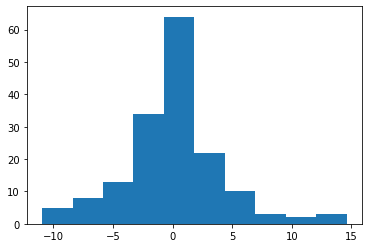

In [ ]:
plt.hist(error_train)

<AxesSubplot:xlabel='highway_mpg'>

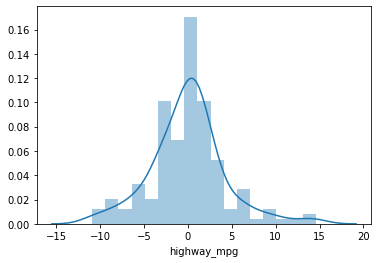

In [ ]:
sns.distplot(error_train)

<AxesSubplot:xlabel='normalized_losses', ylabel='price'>

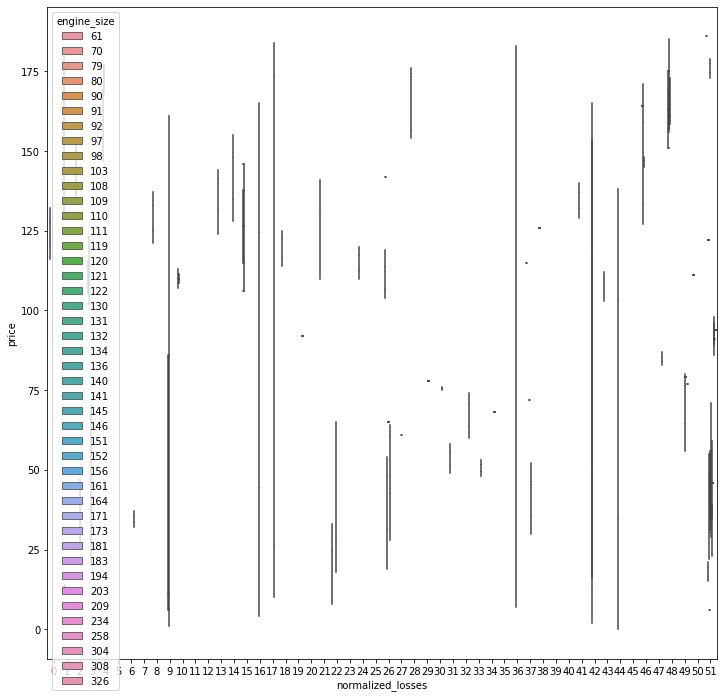

In [ ]:
plt.figure (figsize = (12,12))
sns.boxplot(x = "normalized_losses", y = 'price', data=Pri, hue="engine_size")

In [ ]:
pred_test = reg.predict(Pri_x_test)

In [ ]:
error = Pri_y_test - pred_test
error

120     2.507809
185     1.032555
180    -1.490684
119     0.195464
109     5.800849
104    -9.007698
133    -5.079614
89      2.036531
37      0.326070
34     -0.954476
145    -2.525168
65      1.236259
78      3.618662
152     4.183832
149    -7.783078
66      2.425276
85     -2.401448
173     4.532231
31     -1.685811
91      2.036531
42     -2.350219
41     -4.804804
153     1.793891
54      1.137978
167     1.084715
48      0.999453
50     -4.498193
158   -10.536395
184     0.689720
144   -11.861543
25      2.345871
55     -8.071375
201     8.363470
2      -4.065716
12      1.402678
197     1.211785
96      1.124818
22      3.485526
100    -0.156455
39      0.195196
32      7.045524
Name: highway_mpg, dtype: float64

In [ ]:
mean_y = Pri_y_test.mean()
mean_y

32.073170731707314

In [ ]:
MSE = np.mean(error*error)
MSE

20.122695774926168

In [ ]:
RMSE = np.power(MSE, .8)
RMSE

11.039487932802723

In [ ]:
MAPE = np.mean(np.absolute(error/Pri_y_test))*100
MAPE

11.52955105420209

In [ ]:
acc = 100-MAPE
acc

88.47044894579791

# Logistic Regression

In [ ]:
pri = pd.read_csv(r"car_price.csv - car_price.csv.csv")

In [ ]:
pri = pri.replace({"?"},None)

In [ ]:
pri.head(20)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,gas,std,two,sedan,fwd,front,99.8,audi,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,gas,std,four,sedan,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,gas,std,four,wagon,fwd,front,105.8,audi,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,gas,turbo,four,sedan,fwd,front,105.8,audi,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,gas,turbo,two,hatchback,4wd,front,99.5,audi,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [ ]:
pri.aspiration.fillna("two", inplace=True)
pri.make.fillna("gas", inplace=True)
pri.fuel_type.fillna("turbo", inplace=True)
pri.num_of_doors.fillna("sedan", inplace=True)
pri.body_style.fillna("rwd", inplace=True)
pri.engine_type.fillna("ohc", inplace=True)
pri.wheel_base.fillna("audi", inplace=True)
pri.num_of_cylinders.fillna("four", inplace=True)
pri.fuel_system.fillna("mpfi", inplace=True)

In [ ]:
pri.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [ ]:
pri.fillna(Pri.median(), inplace=True)

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
pri[pri.select_dtypes(include=['object']).columns] = pri[pri.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [ ]:
pri_x = pri.drop(["price"], axis=1)

pri_y = pri.price

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
pri_x = pri.iloc[:,1:22]
pri_y = pri.iloc[:,0]

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
pri_x_train, pri_x_test, pri_y_train, pri_y_test = train_test_split(pri_x,pri_y, test_size=.2, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(pri_x_train, pri_y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
pred_value = logmodel.predict(pri_x_test)
pred_value

array([ 1,  2,  0,  1,  0,  3,  2,  1,  1,  1, -2, -1,  1,  0,  0,  0,  0,
       -1,  1,  1,  1,  2,  0,  1,  2,  0,  1,  2,  2,  0,  1,  3, -1,  1,
        1, -1,  1,  1,  0,  0,  1])

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
tab1 = confusion_matrix(pred_value, pri_y_test)
tab1

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  3,  1,  0,  0,  0],
       [ 0,  1,  8,  2,  0,  0],
       [ 0,  0,  2, 13,  2,  0],
       [ 0,  0,  2,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  2]])

In [ ]:
tab1.diagonal().sum()/tab1.sum()*100

73.17073170731707

In [ ]:
pred_values_prob = logmodel.predict_proba(pri_x_test)
pred_values_prob


array([[9.95406754e-14, 1.22557163e-01, 1.97811010e-01, 6.31871818e-01,
        3.92801336e-02, 8.47987610e-03],
       [8.76491986e-17, 1.05923204e-01, 2.86267513e-01, 6.22938492e-02,
        5.21023239e-01, 2.44921943e-02],
       [7.65188737e-12, 3.51765311e-01, 4.96587316e-01, 1.03756831e-01,
        1.04924042e-03, 4.68413026e-02],
       [8.17193518e-09, 2.71799493e-01, 8.55589094e-05, 3.42395911e-01,
        2.74245172e-01, 1.11473857e-01],
       [1.19443537e-12, 3.95128035e-01, 5.98372587e-01, 5.12995514e-03,
        1.35864221e-03, 1.07811154e-05],
       [1.35094871e-08, 4.54227028e-05, 4.51561156e-02, 9.87527761e-02,
        3.66624013e-03, 8.52379432e-01],
       [2.30184936e-02, 2.51197453e-03, 1.93886635e-01, 1.24687976e-01,
        5.42931183e-01, 1.12963738e-01],
       [9.66015884e-13, 2.26301122e-03, 2.96252674e-02, 6.03005662e-01,
        3.62582187e-01, 2.52387251e-03],
       [6.11120645e-10, 1.59101189e-03, 1.55973592e-01, 6.99069226e-01,
        1.36651277e-01, 

In [ ]:
pred_full_prob = logmodel.predict_proba(pri_x)
#pred_full_prob

In [ ]:
df1 =  pd.concat([pri.symboling, pd.Series(pred_full_prob[:,1])],axis=1)

df1.rename(columns= { df1.columns[0]:"symboling", df1.columns[1]:'Pred__values_Prob'}, inplace=True)

df1.head()

,symboling,Pred__values_Prob
0,3,1.870677e-10
1,3,1.870677e-10
2,1,1.430883e-03
3,2,6.206824e-03
4,2,1.150422e-02


# Desicion Tree

In [ ]:
pri_x = pri.iloc[:,1:24]
pri_y = pri.iloc[:,0]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dt =  DecisionTreeClassifier(criterion='gini', max_depth = 3)

In [ ]:
Dt.fit(pri_x_train, pri_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
pred_Dt = Dt.predict(pri_x_test)

In [ ]:
table_Dt = confusion_matrix(pred_Dt, pri_y_test)
table_Dt

array([[ 0,  0,  0,  0,  0],
       [ 4, 12,  1,  3,  0],
       [ 0,  0, 12,  2,  0],
       [ 0,  1,  1,  1,  0],
       [ 0,  1,  1,  0,  2]])

In [ ]:
table_Dt.diagonal().sum()/table_Dt.sum()*100

65.85365853658537

In [ ]:
pri_x = pri.iloc[:,1:24]
pri_y = pri.iloc[:,0]

In [ ]:
!pip install pydot

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

import pydot

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

Dt.fit(pri_x_train, pri_y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
dot_data = StringIO()

In [ ]:
pri_x_train_names = pri_x_train.columns

In [ ]:
abc = list(pri_y_train)

In [ ]:
fig = plt.figure(figsize=(10,10))

export_graphviz(Dt, out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True, feature_names=pri_x_train_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph) = pydot.graph_from_dot_data(dot_data.getvalue())


<Figure size 720x720 with 0 Axes>